## QRAM Implementation

Complete implementation is referenced from https://quantumcomputinguk.org/tutorials/implementing-qram-in-qiskit-with-code

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

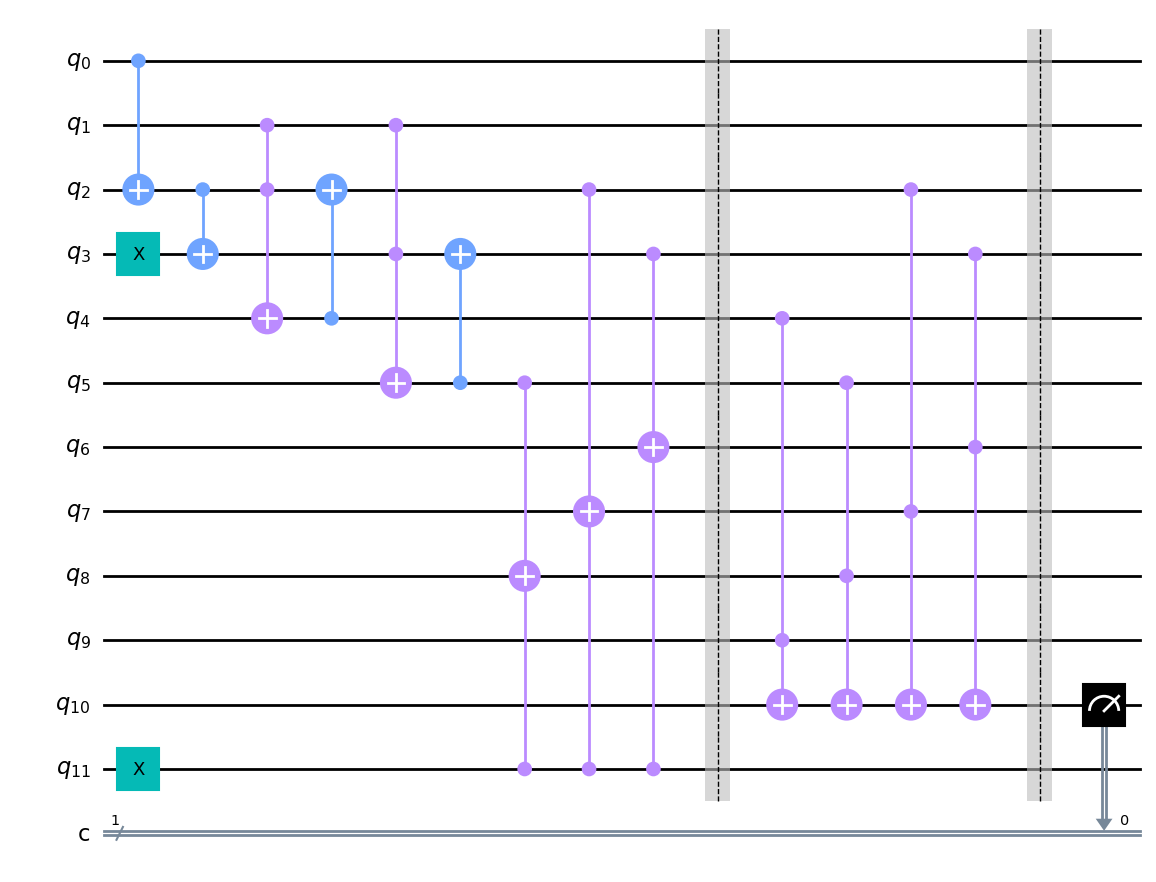

In [2]:
# q0-q1 address qubits
# q2-q5 routing qubits
# q6-q9 memory qubits
# q10 read out qubit
# q11 read/write enable qubit
qc = QuantumCircuit(12, 1)

# Address nodes
# what address we have to query? Ex: |01〉

# Routing nodes
# Whatever qubit in the routing nodes is |1〉will lead to the memory cell that we wish to read.

# Reading the memory

qc.cx(0, 2)
qc.x(3)
qc.cx(2, 3)

qc.ccx(1, 2, 4)
qc.cx(4, 2)

qc.ccx(1, 3, 5)
qc.cx(5, 3)

qc.x(11) #Write mode (read mode if commented)

# Writing to memory
qc.ccx(11, 5, 8)
qc.ccx(11, 2, 7)
qc.ccx(11, 3, 6)

qc.barrier()

# Read the memory
qc.ccx(4, 9, 10)
qc.ccx(5, 8, 10)
qc.ccx(2, 7, 10)
qc.ccx(3, 6, 10)

qc.barrier()
qc.measure(10, 0) # Measuring readout qubit 

qc.draw('mpl')


In [3]:
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=100)
counts = job.result().get_counts(compiled_circuit)
print(counts)

{'1': 100}


## Simple qRAM circuit for demonstration

address |0> = Data |01>

address |1> = Data |11>

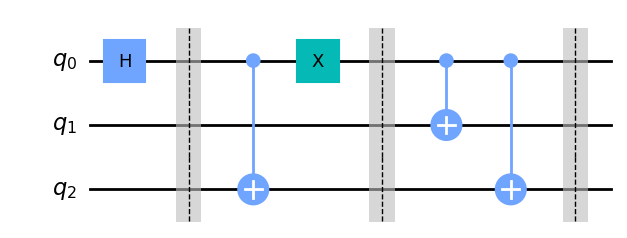

In [5]:
qc = QuantumCircuit(3)
qc.h(0)
qc.barrier()
qc.cx(0, 2)
qc.x(0)
qc.barrier()
qc.cx(0, 1)
qc.cx(0, 2)
qc.barrier()
qc.draw('mpl')
